### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans   

### Data Collection and Loading

In [2]:
# Loading File using read_csv() method
customer_data = pd.read_csv("Dataset/Mall_Customers.csv")

In [3]:
#Let's have a preview of the dataset
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
# Method 1: Using rename() method
customer_data = customer_data.rename(columns={'Genre': 'Gender'})
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [6]:
#Let's See How many Rows and Columns Exist
row, col = customer_data.shape
print(f"Number of Rows: {row}\nNumber of Columnss: {col}")

Number of Rows: 200
Number of Columnss: 5


In [7]:
 #Delving Deep into Information about the DataFrame
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- It is evident from the data that there is no need for missing value handilg cause 200 out of 200 rows are Non-Null for all the given features.
- Note: We have following levels of measurement:
    - 2 Nominal (`CustomerID` , `Gender`)
    - 1 Interval (`Spending Score`)
    - 2 Ratio (`Age` , `Annual Income`)

In [8]:
#Explicitely Calculating Missing Values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#Let's look into some of the Summary Statistics
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
# Let's percentage of Male-Female ratio in the data set
customer_data.Gender.value_counts(normalize= True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

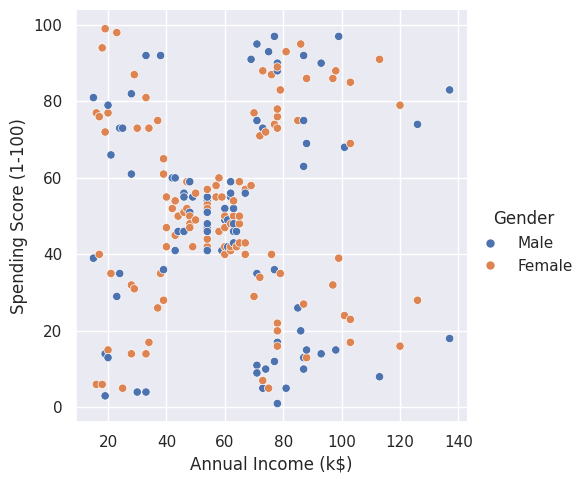

In [36]:
sns.relplot(data=customer_data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

In [44]:
customer_dataNew =customer_data.copy()

# Define 5 bins and labels
binsAge = 5  # or you can use custom bin edges like [0, 20, 35, 50, 65, 100]
labelsAge = ['Very Young', 'Young Adult', 'Middle Aged', 'Senior', 'Elderly']

# Define 5 bins and labels for Spending Score
binsScore = 3  # or you can use custom bin edges like [0, 20, 35, 50, 65, 100]
labelsScore = ['Low', 'Medium', 'High']

# Create binned column in the original DataFrame
customer_dataNew['AgeGroup'] = pd.cut(customer_dataNew['Age'], bins=binsAge, labels=labelsAge)
customer_dataNew['SpendingHabit'] = pd.cut(customer_dataNew['Spending Score (1-100)'], bins=binsScore, labels=labelsScore)

customer_dataNew.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,AgeGroup,SpendingHabit
0,1,Male,19,15,39,3,Very Young,Medium
1,2,Male,21,15,81,4,Very Young,High
2,3,Female,20,16,6,3,Very Young,Low
3,4,Female,23,16,77,4,Very Young,High
4,5,Female,31,17,40,3,Young Adult,Medium


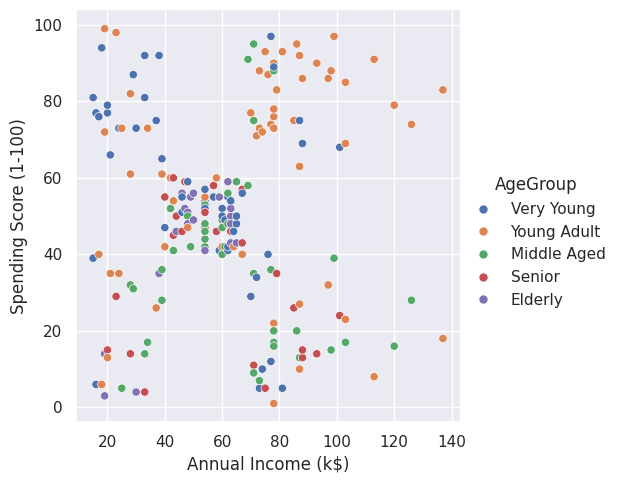

In [43]:
sns.relplot(data=customer_dataNew, x="Annual Income (k$)", y="Spending Score (1-100)", hue="AgeGroup")

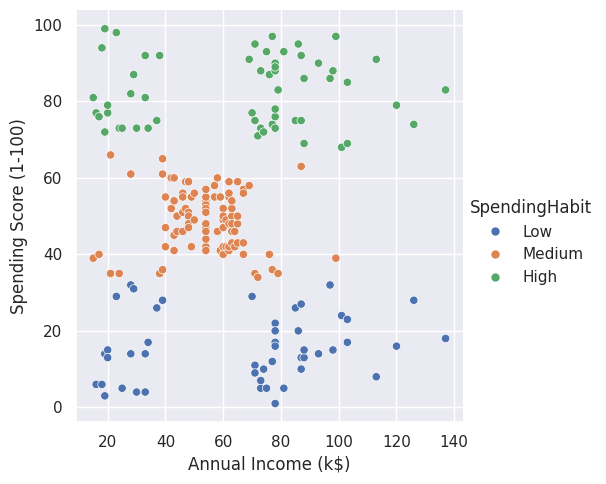

In [46]:
sns.relplot(data=customer_dataNew, x="Annual Income (k$)", y="Spending Score (1-100)", hue="SpendingHabit")

<Axes: >

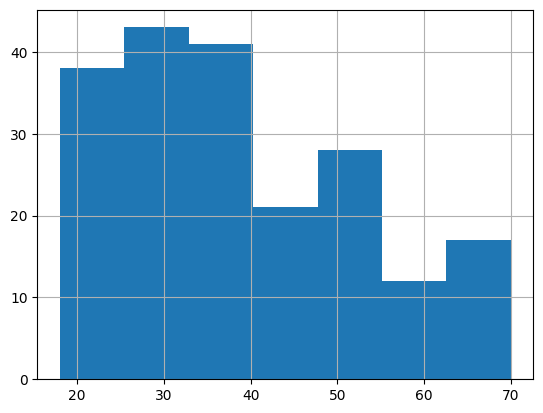

In [12]:
# Let's percentage of Male-Female ratio in the data set
customer_data.Age.hist(bins= 7, )

<Figure size 700x700 with 0 Axes>

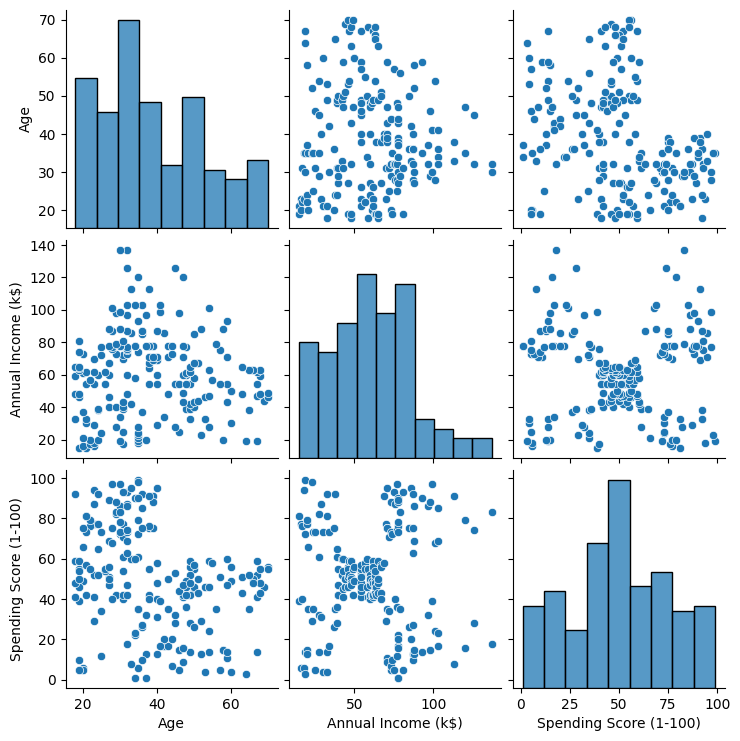

In [13]:
plt.figure(figsize=(7,7))
sns.pairplot(customer_data.drop(['CustomerID',"Gender"],axis="columns"))
plt.show()

The **Scatter-Matrix Plot** depicts the following:
 - Histogram of Age, Annual Income Shows slight +ve skewness
 - Spending Score is almost Normally Distributed
 - The Scatter-Plot(s) depict no note-worthy trend between variables concerned.

Note: Further Investigation will be carried out using **Kernel Desity**

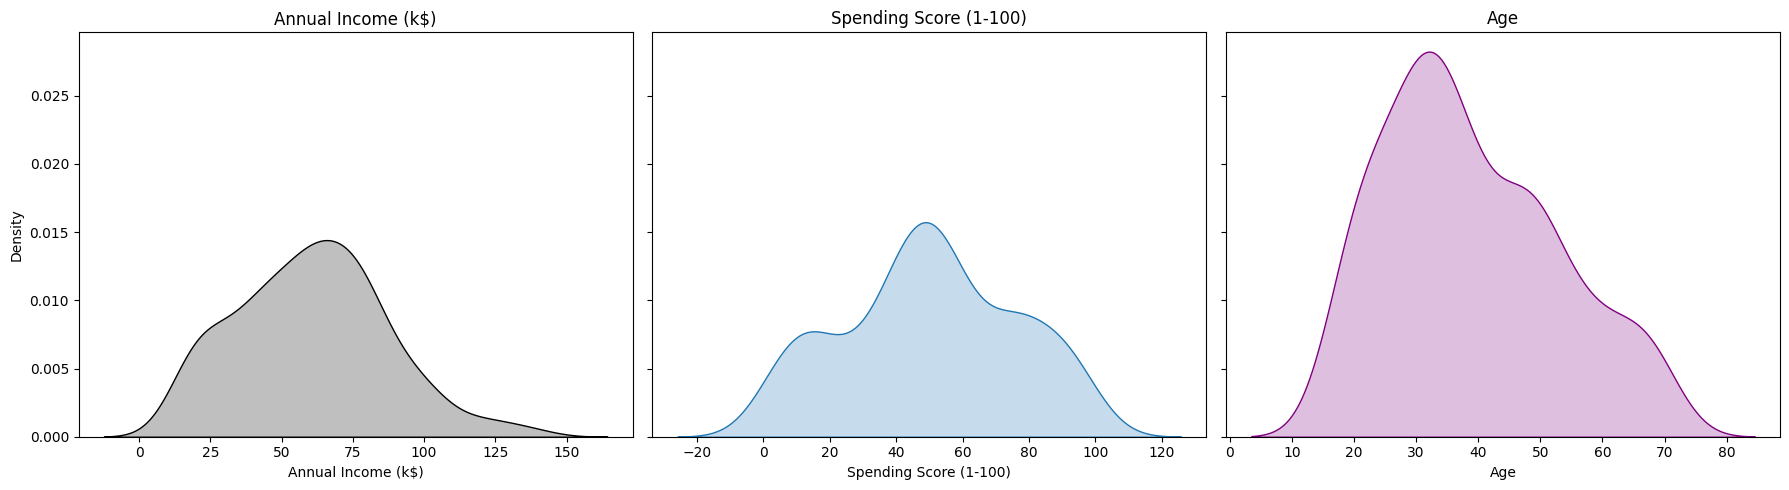

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots: 1 row, 3 columns, sharing y-axis
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot KDE for Annual Income
sns.kdeplot(data=customer_data, x="Annual Income (k$)", ax=axes[0], fill=True, color= "0")
axes[0].set_title("Annual Income (k$)")

# Plot KDE for Spending Score
sns.kdeplot(data=customer_data, x="Spending Score (1-100)", ax=axes[1], fill=True, )
axes[1].set_title("Spending Score (1-100)")

# Plot KDE for Age
sns.kdeplot(data=customer_data, x="Age", ax=axes[2], fill=True, color= "purple")
axes[2].set_title("Age")

# Adjust layout
plt.tight_layout()
plt.show()


Here we created subplots (Kernel Distribution Estimation):
- We can see all the features depict nearly Normal Probability Distribution

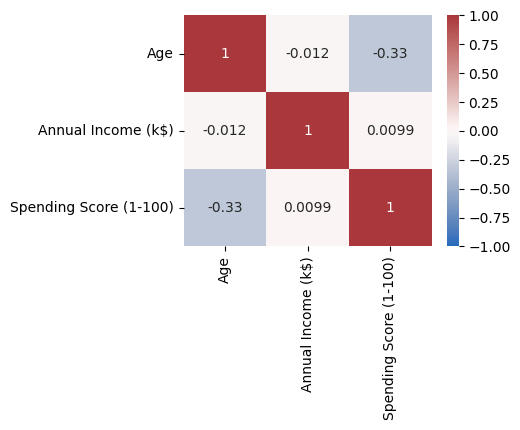

In [15]:
plt.figure(figsize= (4,3))
cr = customer_data.drop(["CustomerID","Gender"],axis="columns").corr()
sns.heatmap(cr,annot= True , vmin=-1 ,vmax= 1, center= 0, cmap="vlag")
plt.show()

The above Correlation Matrix depict the following:
- Age Vs. Annual Income
    - Strength of Association is very low (Medium) and indirect
    - With increase in Age, income goes down. (Strength is low, hence not convincing)
- Age Vs. Spending Score
    - Strength of Association is low (highest) and indirect
    - With increase in Age, Spending decreases.
- Annual Income and Spending Score
    - Strength of Association is negligible (lowest) and direct
    - Annual Income and Spending increase-decrease simultaneously. (Strength is low, hence not convincing)


In [16]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.heatmap(cm1,annot= True)


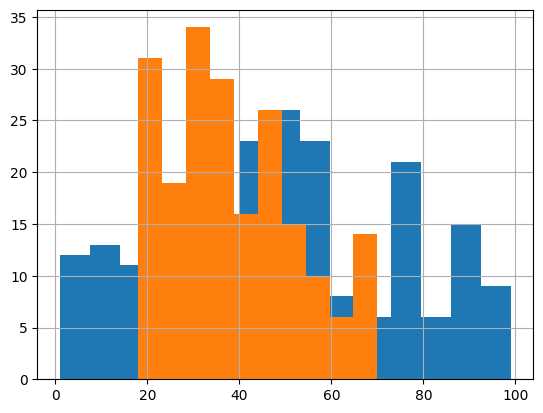

In [17]:
# let's Create Histograms

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
customer_data["Spending Score (1-100)"].hist(bins= 15)
customer_data["Age"].hist(bins= 10)
plt.show()

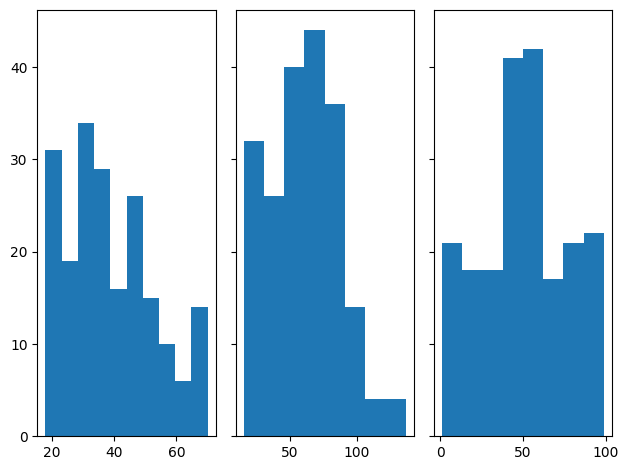

In [18]:
# Generate two normal distributions
dist1 = customer_data["Age"]
dist2 = customer_data["Annual Income (k$)"]
dist3 = customer_data["Spending Score (1-100)"]

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=10)
axs[1].hist(dist2, bins=8)
axs[2].hist(dist3, bins=8)

plt.show()

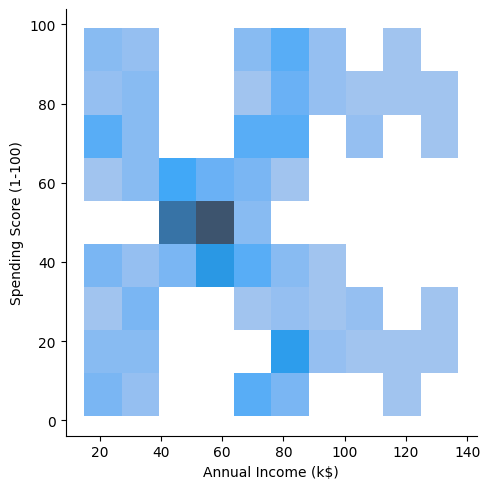

In [19]:
sns.displot(customer_data, x=dist2, y=dist3)

### Feature Extraction 

In [20]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
#Taking only last two columns for clustering
X1 = customer_data[["Annual Income (k$)",'Spending Score (1-100)']]
X1.shape

(200, 2)

### Choosing the Number of Clusters

- `Within Cluster Sum of Squares(WCSS)` - will help us deciding that hyperparameter using elbow plot.
$$
WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} (x_j - \mu_i)^2
$$

In [22]:
#Finding WCSS Value for upto 10 Clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

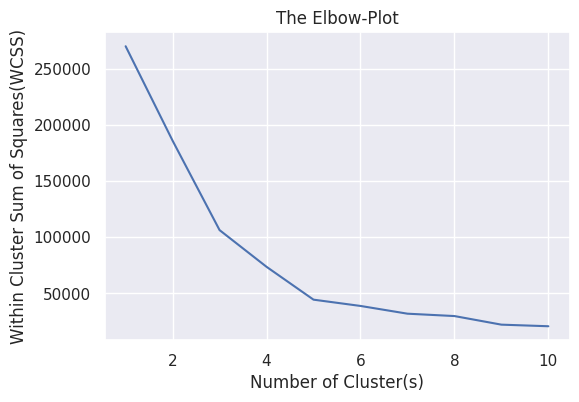

In [23]:
# Creating Elbow-Plot
sns.set_theme()
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss)
plt.title("The Elbow-Plot")
plt.xlabel("Number of Cluster(s)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.show()


-The Optimum number of Clusters will be 5

### K-Means Clustering Model Training 

In [24]:
# Finalling fitting the model with 5 Clusters
fitKmeans = KMeans(n_clusters=5,init="k-means++",random_state= 0)

In [25]:
# Let's see how each data points are clustered
cluster = fitKmeans.fit_predict(X1)
cluster

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### Cluster Visualization

In [26]:
# Incorporating Cluster in the DataFrame
customer_data["Cluster"] = cluster
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [27]:
#Let's segregate the data as per cluster
cluster_range = range(5)
df0 = customer_data.loc[customer_data["Cluster"] == 0]
df1 = customer_data.loc[customer_data["Cluster"] == 1]
df2 = customer_data.loc[customer_data["Cluster"] == 2]
df3 = customer_data.loc[customer_data["Cluster"] == 3]
df4 = customer_data.loc[customer_data["Cluster"] == 4]

In [28]:
df0.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [29]:
# Segregating Clusters
centroids = fitKmeans.cluster_centers_
x_centre=[]
y_centre=[]
for i in range(len(centroids)):
    x_centre.append(centroids[i][0])
    y_centre.append(centroids[i][1])

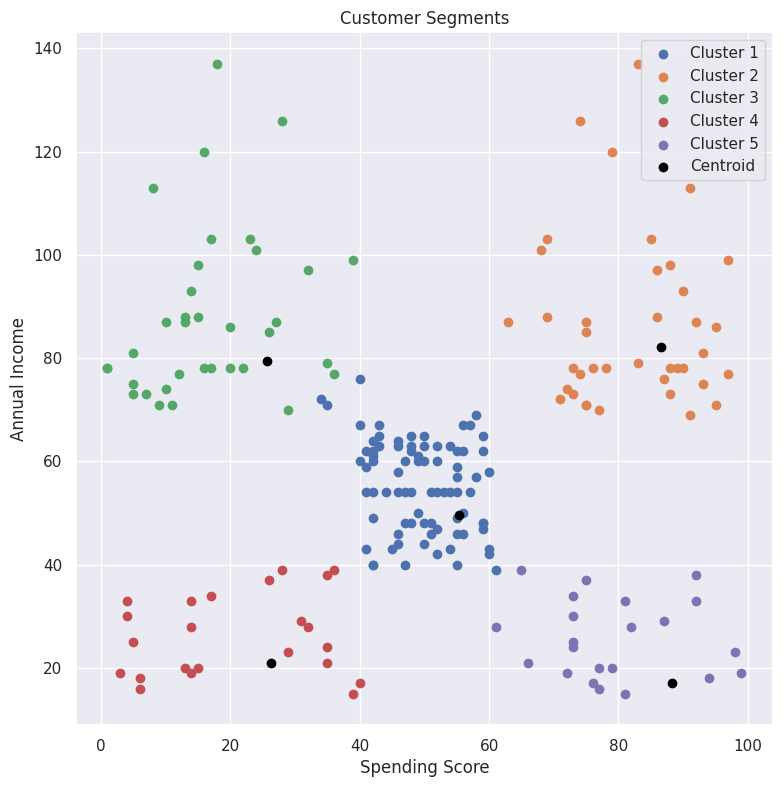

In [30]:
# Creating Cluster Visualization
plt.figure(figsize=(9,9))
plt.title("Customer Segments")
plt.scatter(df0['Spending Score (1-100)'],df0['Annual Income (k$)'],label="Cluster 1")
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],label="Cluster 2")
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],label="Cluster 3")
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],label="Cluster 4")
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],label="Cluster 5")
plt.scatter(x_centre,y_centre,c="black", label="Centroid")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.legend()
plt.show()